## Import libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import random

## Reading the data

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header = None)

### Since we don't have headers but have a description in the repository, we have to pass names to the df

In [3]:
df.columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean',
              'perimeter_mean', 'area_mean', 'smoothness_mean', 
              'compactness_mean', 'concavity_mean', 'concave.points_mean', 
              'symmetry_mean', 'fractal_dimension_mean', 'radius_se',
              'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 
              'compactness_se', 'concavity_se', 'concave.points_se',
              'symmetry_se', 'fractal_dimension_se', 'radius_worst',
              'texture_worst', 'perimeter_worst', 'area_worst', 
              'smoothness_worst', 'compactness_worst', 'concavity_worst', 
              'concave.points_worst', 'symmetry_worst', 'fractal_dimension_worst']              

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Diagnosis column contains categorical values, and since there are only 2 classes we can easily convert it to continous variable avoiding OneHot encoding

In [6]:
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M':1})

### Check for nulls

In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave.points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave.points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave.points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### There are no nulls, which is great so data imputation is not needed.

## What are the mean, median and standard deviation of the “perimeter” feature?


In [8]:
df.perimeter_mean.describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

In [7]:
df.perimeter_mean.median()

86.24

### Mean - 91.969033
### Median - 2nd quantile: 86.240000
### Standard deviation: 24.298981

## Is the first feature in this data set (the “radius”) normally distributed? Please quantitatively define you answer. If not, what might be a more appropriate distribution?

In [9]:
n_samples, n_features = df.shape

In [10]:
df.drop('id', axis = 1, inplace = True)

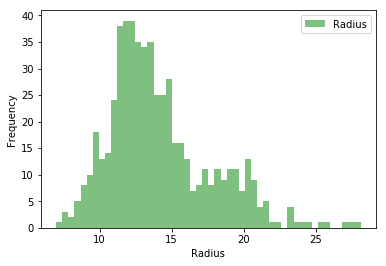

In [11]:
samples = df.radius_mean.values

plt.figure(1)
plt.hist(samples, 50, alpha=0.5, label='Radius', density=False, color='g')

plt.legend(loc='upper right')
plt.xlabel('Radius')
plt.ylabel('Frequency')
plt.show()


### This plot doesn't look like Gauss' distribution, but let's check the skewness as an additional metric.

In [12]:
df.radius_mean.skew()


0.9423795716730992

### Let's check the distribution among Benign and Malignant samples. 

In [33]:
benign_samples = df['radius_mean'][df['diagnosis'] == 0]
malignant_samples = df['radius_mean'][df['diagnosis'] == 1]

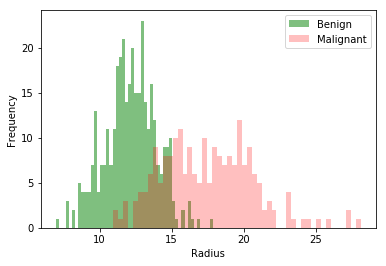

In [34]:
plt.figure(2)
plt.hist(benign_samples, 50, alpha=0.5, label='Benign', density=False, color='g')
plt.hist(malignant_samples, 50, alpha=0.25, label='Malignant', density=False, color='r')
plt.legend(loc='upper right')
plt.xlabel('Radius')
plt.ylabel('Frequency')
plt.show()

### This one is better. Let's check skewness again.

In [40]:
benign_samples.skew()


-0.08379911084596789

In [41]:
malignant_samples.skew()


0.5019020231808634

In [42]:
stats.normaltest(malignant_samples)


NormaltestResult(statistic=9.774681423412504, pvalue=0.0075414507243749054)

In [43]:
stats.normaltest(benign_samples)


NormaltestResult(statistic=0.4345062158247273, pvalue=0.8047262609420585)

### As we can see, malignant samples are most likely to be normally distributed rather than benign samples.

## Train a classifier to predict the diagnosis of malignant or benign. Please compare the results of two classifiers e.g. SVM, logistic regression, decision tree etc.
 

### Generally speaking, that's a good practice to train some kind of a dumb classifier and use it's results as a baseline.  But let's jump straightforward to LogReg and SVM using all features and check the results?

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [52]:
X = df.drop(['diagnosis'], axis=1)
y = df.diagnosis


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

/usr/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [53]:
log_cl = LogisticRegression(C=20, random_state=42)
log_cl.fit(X_train, y_train)


/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
y_pred_logr = log_cl.predict(X_test)


In [55]:
f1_score(y_test, y_pred_logr)


0.9397590361445783

### Quite good results, let's check SVM

In [56]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Since SVM is very sensitive to unscaled data, we have to run a pipeline and scale data first.

In [60]:
lin_svm_pipeline = Pipeline([("scaler", StandardScaler()),('linearSVC',SVC(kernel="linear", C=1/20, random_state=42))])
lin_svm_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False))])

In [61]:
y_pred_lin_svm = lin_svm_pipeline.predict(X_test)


In [62]:
f1_score(y_test, y_pred_linear_SVM)


0.9761904761904763

### The result is even better, but that's expectable - Support Vector Machines tend to be a good classifiers.